In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings.ignore=True

In [2]:
df = pd.read_csv("Japan_data.csv",delimiter=",")
df

Time  Total population (Both sexes)?person?  \
0    Oct.1996                              125859000   
1    Nov.1996                              125890000   
2    Dec.1996                              125939000   
3    Jan.1997                              125747000   
4    Feb.1997                              125912000   
..        ...                                    ...   
320  Jun.2023                              124511000   
321  Jul.2023                              124517000   
322  Aug.2023                              124439000   
323  Sep.2023                              124348000   
324  Oct.2023                              124340000   

     Total population (0-14)?person?  Total population (15-64)?person?  \
0                           19690000                          87160000   
1                           19660000                          87160000   
2                           19640000                          87170000   
3                           19580000                          87020000   
4                           19580000                          87090000   
..                               ...                               ...   
320                         14290000                          74005000   
321                         14281000                          74015000   
322                         14240000                          73972000   
323                         14203000                          73921000   
324                         14190000                          73930000   

     Total population (65 and over)?person?  Live births?person?  \
0                                  19020000             104634.0   
1                                  19080000              96903.0   
2                                  19130000              99288.0   
3                                  19150000             100094.0   
4                                  19250000              88370.0   
..                                      ...                  ...   
320                                36216000              61378.0   
321                                36220000              64034.0   
322                                36228000              65364.0   
323                                36225000              61286.0   
324                                36220000                  NaN   

     Deaths?person?  Employment rate (Both sexes)?%?  \
0           73374.0                             61.8   
1           73927.0                             61.3   
2           85639.0                             60.9   
3          102195.0                             60.4   
4           80072.0                             60.4   
..              ...                              ...   
320        112389.0                             61.5   
321        119412.0                             61.4   
322        129690.0                             61.4   
323        126188.0                             61.6   
324             NaN                             61.5   

     Unemployment rate (Both sexes)?%?  
0                                  3.4  
1                                  3.2  
2                                  3.1  
3                                  3.3  
4                                  3.5  
..                                 ...  
320                                2.6  
321                                2.6  
322                                2.7  
323                                2.6  
324                                2.5  

[325 rows x 9 columns]

# Data Cleaning

#### converting some columns to their proper formats

In [3]:
df["Time"] = pd.to_datetime(df["Time"])
df.info() #1 non-null value for each of column 5 and 6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Time                                    325 non-null    datetime64[ns]
 1   Total population (Both sexes)?person?   325 non-null    int64         
 2   Total population (0-14)?person?         325 non-null    int64         
 3   Total population (15-64)?person?        325 non-null    int64         
 4   Total population (65 and over)?person?  325 non-null    int64         
 5   Live births?person?                     324 non-null    float64       
 6   Deaths?person?                          324 non-null    float64       
 7   Employment rate (Both sexes)?%?         325 non-null    float64       
 8   Unemployment rate (Both sexes)?%?       325 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage

#### renaming the columns

In [4]:
df.columns= ["Time","Total_Population", "Population[0-14]", "Population[15-64]","Population[>65]", "Live_Births", "Deaths", "Employment_rate", "Unemployment_rate"]
df.head()

Time  Total_Population  Population[0-14]  Population[15-64]  \
0 1996-10-01         125859000          19690000           87160000   
1 1996-11-01         125890000          19660000           87160000   
2 1996-12-01         125939000          19640000           87170000   
3 1997-01-01         125747000          19580000           87020000   
4 1997-02-01         125912000          19580000           87090000   

   Population[>65]  Live_Births    Deaths  Employment_rate  Unemployment_rate  
0         19020000     104634.0   73374.0             61.8                3.4  
1         19080000      96903.0   73927.0             61.3                3.2  
2         19130000      99288.0   85639.0             60.9                3.1  
3         19150000     100094.0  102195.0             60.4                3.3  
4         19250000      88370.0   80072.0             60.4                3.5

#### filling in null-values

In [5]:
df["Live_Births"].fillna(method="ffill", inplace=True)
df["Deaths"].fillna(method="ffill", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               325 non-null    datetime64[ns]
 1   Total_Population   325 non-null    int64         
 2   Population[0-14]   325 non-null    int64         
 3   Population[15-64]  325 non-null    int64         
 4   Population[>65]    325 non-null    int64         
 5   Live_Births        325 non-null    float64       
 6   Deaths             325 non-null    float64       
 7   Employment_rate    325 non-null    float64       
 8   Unemployment_rate  325 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 23.0 KB


# Data Visualization

In [6]:
fig = px.line(df, x="Time", y="Total_Population", title="The Population in Japan Throughout years")
fig.update_traces(mode='markers+lines')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

notice there's an abnormal look (seemingly there's a typo in the naming of the year)

In [11]:
df["Time"].replace("2026-05-01", "2016-05-01", inplace=True)

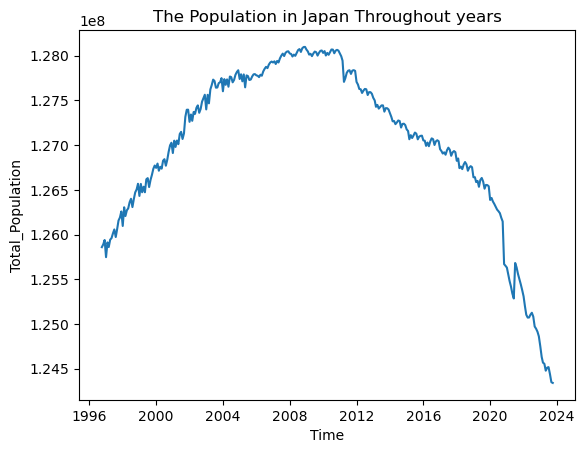

In [20]:
plt.title("The Population in Japan Throughout years")
sns.lineplot(data=df, x="Time", y="Total_Population")
plt.show()

from the graph above, we can see the population significally declines from october 2020

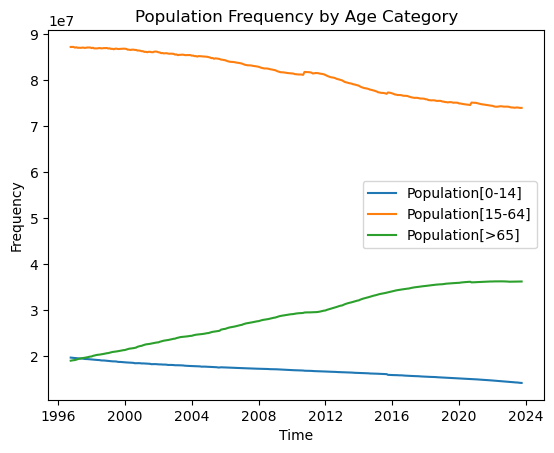

In [12]:
sns.lineplot(data=df, x="Time", y="Population[0-14]", label="Population[0-14]")
sns.lineplot(data=df, x="Time", y="Population[15-64]", label="Population[15-64]")
sns.lineplot(data=df, x="Time", y="Population[>65]", label="Population[>65]")
plt.ylabel("Frequency")
plt.title("Population Frequency by Age Category")
plt.show()

The productive-age population is declining while the number of children is very small and also decreasing slowly. On the other hand, the elderly population continues to increase.

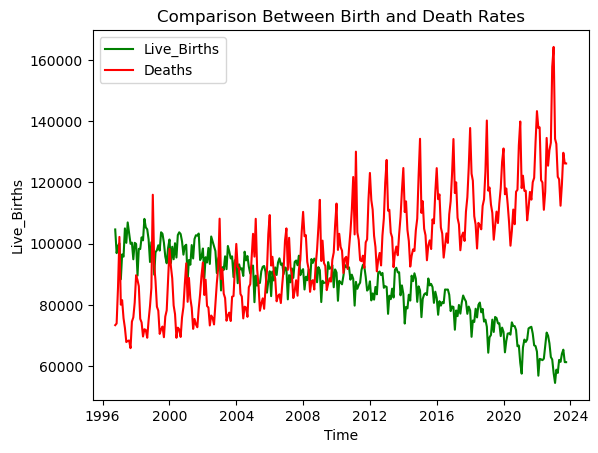

In [13]:
sns.lineplot(data=df, x="Time", y="Live_Births", label="Live_Births",color="Green")
sns.lineplot(data=df, x="Time", y="Deaths", label="Deaths",color="red")
plt.title("Comparison Between Birth and Death Rates")
plt.show()

from the graph above, i notice sort of seasonality and trend

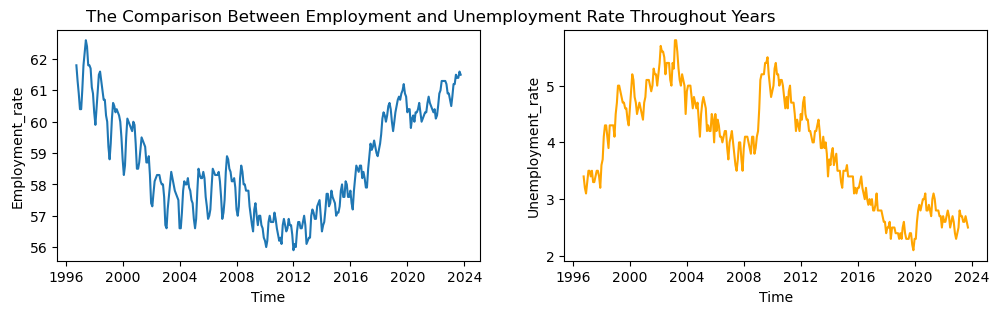

In [24]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
sns.lineplot(data=df, x="Time", y="Employment_rate",ax=ax[0])
sns.lineplot(data=df, x="Time", y="Unemployment_rate",color="orange",ax=ax[1])
plt.title("The Comparison Between Employment and Unemployment Rate Throughout Years", ha="right")
plt.show()

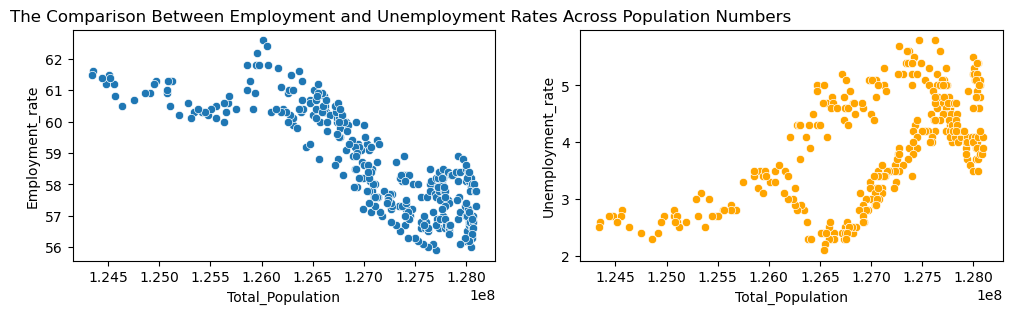

In [27]:
fig,ax = plt.subplots(1,2,figsize=(12,3))
sns.scatterplot(data=df, x="Total_Population", y="Employment_rate",ax=ax[0])
sns.scatterplot(data=df, x="Total_Population", y="Unemployment_rate",color="orange",ax=ax[1])
plt.title("The Comparison Between Employment and Unemployment Rates Across Population Numbers", ha="right")
plt.show()

<AxesSubplot:>

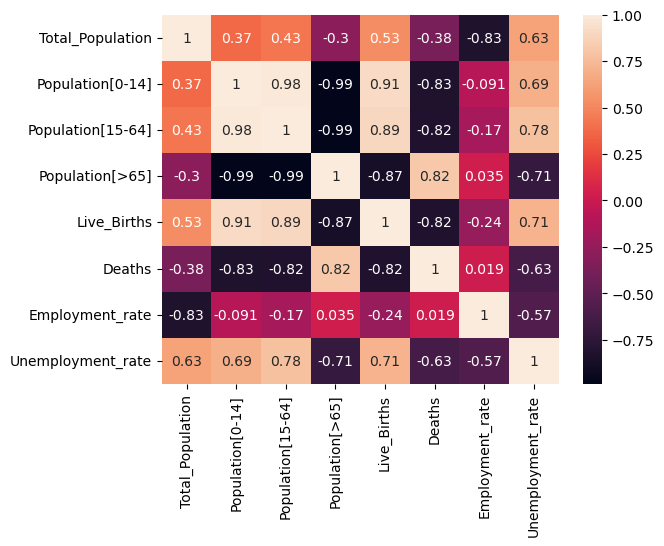

In [27]:
sns.heatmap(df.corr(), annot=True)

# Data Preparation

### adding and renaming columns

In [ ]:
df["month"] = df["Time"].dt.month

In [ ]:
df.rename(columns={"Time": "ds"}, inplace=True)
df.rename(columns={"Total_Population": "y"}, inplace=True)

Renaming the column names according to the Prophet format for time and target column

### Scalling

In [35]:
from sklearn.preprocessing import RobustScaler

In [36]:
scaler = RobustScaler()
scaled = scaler.fit_transform(df.drop(columns="ds"))
scaled = pd.DataFrame(scaled, columns=df.iloc[:,1:].columns)

In [37]:
df_scaled = pd.concat([df.iloc[:,0], scaled],axis=1)
df_scaled

ds         y  Population[0-14]  Population[15-64]  \
0   1996-10-01 -1.063018          1.223461           0.627897   
1   1996-11-01 -1.037313          1.210080           0.627897   
2   1996-12-01 -0.996683          1.201160           0.629005   
3   1997-01-01 -1.155887          1.174398           0.612374   
4   1997-02-01 -1.019071          1.174398           0.620135   
..         ...       ...               ...                ...   
320 2023-06-01 -2.180763         -1.185103          -0.830691   
321 2023-07-01 -2.175788         -1.189117          -0.829582   
322 2023-08-01 -2.240464         -1.207404          -0.834350   
323 2023-09-01 -2.315920         -1.223907          -0.840004   
324 2023-10-01 -2.322554         -1.229706          -0.839007   

     Population[>65]  Live_Births    Deaths  Employment_rate  \
0          -0.976093     1.141906 -0.950013         1.206897   
1          -0.970378     0.611149 -0.928783         1.034483   
2          -0.965616     0.774887 -0.479134         0.896552   
3          -0.963711     0.830221  0.156486         0.724138   
4          -0.954186     0.025333 -0.692863         0.724138   
..               ...          ...       ...              ...   
320         0.661777    -1.827750  0.547856         1.103448   
321         0.662158    -1.645407  0.817484         1.068966   
322         0.662920    -1.554099  1.212078         1.068966   
323         0.662635    -1.834066  1.077629         1.137931   
324         0.662158    -1.834066  1.077629         1.103448   

     Unemployment_rate     month  
0            -0.352941  0.500000  
1            -0.470588  0.666667  
2            -0.529412  0.833333  
3            -0.411765 -1.000000  
4            -0.294118 -0.833333  
..                 ...       ...  
320          -0.823529 -0.166667  
321          -0.823529  0.000000  
322          -0.764706  0.166667  
323          -0.823529  0.333333  
324          -0.882353  0.500000  

[325 rows x 10 columns]

### Splitting training-testing sets

In [38]:
train1 = df_scaled[(df_scaled["ds"] <"2020-01-01")]
test1 = df_scaled[(df_scaled["ds"] >="2020-01-01")]
print(train1.shape)
print(test1.shape)

(279, 10)
(46, 10)


# Prediction Models

In [39]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
from prophet.plot import plot_plotly, plot_components_plotly

### model1 (original df_scaled)

In [365]:
model1 = Prophet(interval_width=0.95)

In [366]:
model1.add_regressor("Population[0-14]")
model1.add_regressor("Population[15-64]")
model1.add_regressor("Population[>65]")
model1.add_regressor("Live_Births")
model1.add_regressor("Deaths")
model1.add_regressor("Employment_rate")
model1.add_regressor("Unemployment_rate")

In [367]:
model1.fit(train1)

22:33:33 - cmdstanpy - INFO - Chain [1] start processing
22:33:33 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future = df_scaled.drop(columns="y")
future.tail()

ds  Population[0-14]  Population[15-64]  Population[>65]  \
320 2023-06-01         -1.185103          -0.830691         0.661777   
321 2023-07-01         -1.189117          -0.829582         0.662158   
322 2023-08-01         -1.207404          -0.834350         0.662920   
323 2023-09-01         -1.223907          -0.840004         0.662635   
324 2023-10-01         -1.229706          -0.839007         0.662158   

     Live_Births    Deaths  Employment_rate  Unemployment_rate     month  
320    -1.827750  0.547856         1.103448          -0.823529 -0.166667  
321    -1.645407  0.817484         1.068966          -0.823529  0.000000  
322    -1.554099  1.212078         1.068966          -0.764706  0.166667  
323    -1.834066  1.077629         1.137931          -0.823529  0.333333  
324    -1.834066  1.077629         1.103448          -0.882353  0.500000

In [369]:
prediction1 = model1.predict(future)
prediction1[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds      yhat  yhat_lower  yhat_upper
320 2023-06-01 -1.305193   -1.473953   -1.150762
321 2023-07-01 -1.294330   -1.473673   -1.128450
322 2023-08-01 -1.332629   -1.518923   -1.156378
323 2023-09-01 -1.388619   -1.573005   -1.211324
324 2023-10-01 -1.395737   -1.594832   -1.205987

In [371]:
rmse1 = np.sqrt(mean_squared_error(test1["y"], prediction1["yhat"][279:326]))
rmse1

0.6421826102465934

In [373]:
plot_plotly(model1, prediction1)

In [374]:
reverse = pd.concat([prediction1["yhat"], future.iloc[:,1:]],axis=1)
reverse = scaler.inverse_transform(reverse)
reverse = pd.DataFrame(reverse)
reverse.rename(columns={0:"prediction1"},inplace=True)
reverse.tail()

prediction1           1           2           3        4         5  \
320  1.255669e+08  14290000.0  74005000.0  36216000.0  61378.0  112389.0   
321  1.255800e+08  14281000.0  74015000.0  36220000.0  64034.0  119412.0   
322  1.255339e+08  14240000.0  73972000.0  36228000.0  65364.0  129690.0   
323  1.254663e+08  14203000.0  73921000.0  36225000.0  61286.0  126188.0   
324  1.254577e+08  14190000.0  73930000.0  36220000.0  61286.0  126188.0   

        6    7     8  
320  61.5  2.6   6.0  
321  61.4  2.6   7.0  
322  61.4  2.7   8.0  
323  61.6  2.6   9.0  
324  61.5  2.5  10.0

In [375]:
result1 = pd.concat([df[["ds","y"]], reverse["prediction1"]],axis=1)
result1

ds          y   prediction1
0   1996-10-01  125859000  1.258808e+08
1   1996-11-01  125890000  1.259007e+08
2   1996-12-01  125939000  1.259303e+08
3   1997-01-01  125747000  1.258064e+08
4   1997-02-01  125912000  1.259212e+08
..         ...        ...           ...
320 2023-06-01  124511000  1.255669e+08
321 2023-07-01  124517000  1.255800e+08
322 2023-08-01  124439000  1.255339e+08
323 2023-09-01  124348000  1.254663e+08
324 2023-10-01  124340000  1.254577e+08

[325 rows x 3 columns]

Text(0, 0.5, 'Total Population')

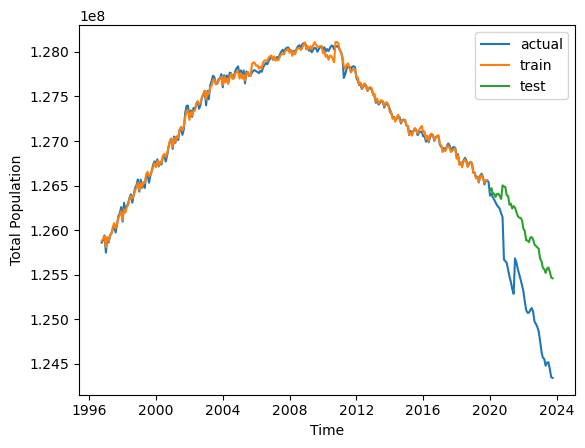

In [376]:
sns.lineplot(data=df, x="ds", y="y", label="actual")
sns.lineplot(data=result1, x="ds",y=result1.iloc[:278,2],label="train")
sns.lineplot(data=result1, x="ds",y=result1.iloc[279:,2],label="test")
plt.xlabel("Time")
plt.ylabel("Total Population")

# Setting Parameters

### model2 (manually settings)

functions for further various models

In [41]:
def make_prophet(model):
    model.add_regressor("Population[0-14]")
    model.add_regressor("Population[15-64]")
    model.add_regressor("Population[>65]")
    model.add_regressor("Live_Births")
    model.add_regressor("Deaths")
    model.add_regressor("Employment_rate")
    model.add_regressor("Unemployment_rate")
    
    model.fit(train1)
    prediction = model.predict(future)

    rmse = np.sqrt(mean_squared_error(test1["y"], prediction["yhat"][279:326]))
    
    reverse = pd.concat([prediction["yhat"], future.iloc[:,1:]],axis=1)
    reverse = scaler.inverse_transform(reverse)
    reverse = pd.DataFrame(reverse)
    reverse.rename(columns={0:"prediction"},inplace=True)

    result = pd.concat([df[["ds","y"]], reverse["prediction"]],axis=1)
    result.rename(columns={"ds": "Time", "y": "actual"}, inplace=True)
    
    return prediction,rmse,result

In [42]:
def graph(result):
    sns.lineplot(data=df, x="ds", y="y", label="actual")
    sns.lineplot(data=result, x="Time",y=result.iloc[:278,2],label="train")
    sns.lineplot(data=result, x="Time",y=result.iloc[279:,2],label="test")
    plt.xlabel("Time")
    plt.ylabel("Total Population")

In [31]:
fig = px.line(df, x="ds", y="y", title="The Population in Japan Throughout years")
fig.update_traces(mode='markers+lines')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

- From the slider plot above, it can be observed that there are several points indicating sudden changes, around the dates of "2011-03-01" and "2019-12-01," which are marked by sharp drops
- From these two points, they can be used to set the "changepoints" parameter
- since parameter yearly_seasonality has a default settings of "True", therefore i dont need to add and set it anymore

In [334]:
model2 = Prophet(interval_width=0.95, changepoints=["2011-03-01","2019-12-01"])
prediction2,rmse2,result2 = make_prophet(model2)

22:09:52 - cmdstanpy - INFO - Chain [1] start processing
22:09:52 - cmdstanpy - INFO - Chain [1] done processing


In [335]:
result2

Time     actual    prediction
0   1996-10-01  125859000  1.257635e+08
1   1996-11-01  125890000  1.258008e+08
2   1996-12-01  125939000  1.258338e+08
3   1997-01-01  125747000  1.256367e+08
4   1997-02-01  125912000  1.258523e+08
..         ...        ...           ...
320 2023-06-01  124511000  1.247112e+08
321 2023-07-01  124517000  1.247696e+08
322 2023-08-01  124439000  1.246489e+08
323 2023-09-01  124348000  1.246226e+08
324 2023-10-01  124340000  1.245649e+08

[325 rows x 3 columns]

In [336]:
rmse2

0.241230982199527

The tuning parameter results in a remarkable improvement, indicated by a significantly smaller RMSE value compared to the previous model

In [337]:
plot_plotly(model2, prediction2)

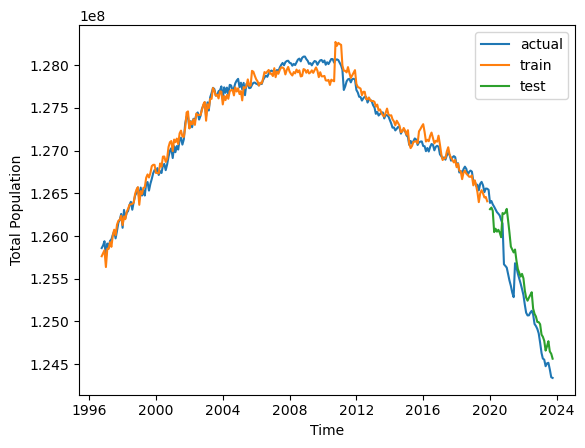

In [345]:
graph(result2)

## automatic tunning

### model3 (manually looping tunning)

In [40]:
from sklearn.model_selection import ParameterGrid

In [359]:
param_grid = {
    "changepoint_prior_scale":[0.001, 0.05, 0.08, 0.5],
    "seasonality_prior_scale": [0.01, 1, 5, 10, 12],
    "seasonality_mode": ["additive", "multiplicative"]
}

best_params=None
best_low_error = float('inf')

for params in ParameterGrid(param_grid):
    auto_model1 = Prophet(interval_width=0.95, changepoints=["2011-03-01","2019-12-01"], **params)
    auto_model1 = auto_model1.fit(train1)
    auto_prediction = auto_model1.predict(future)
    error_rate = np.sqrt(mean_squared_error(test1["y"], auto_prediction["yhat"][279:325]))
    
    if(error_rate<best_low_error):
        best_low_error = error_rate
        best_params = params

22:29:44 - cmdstanpy - INFO - Chain [1] start processing
22:29:44 - cmdstanpy - INFO - Chain [1] done processing
22:29:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:29:44 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
22:29:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
22:29:45 - cmdstanpy - INFO - Chain [1] start processing
22:29:45 - cmdstanpy - INFO - Chain [1] done processing
22:29:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

In [360]:
print("best params: ", best_params)
print("score: ", best_low_error)

best params:  {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 12}
score:  0.5609240718987


In [361]:
model3 = Prophet(interval_width=0.95, changepoints=["2011-03-01","2019-12-01"],**best_params)
prediction3,rmse3,result3 = make_prophet(model3)

22:32:28 - cmdstanpy - INFO - Chain [1] start processing
22:32:28 - cmdstanpy - INFO - Chain [1] done processing


In [362]:
rmse3

0.2959777398831356

In [363]:
plot_plotly(model3, prediction3)

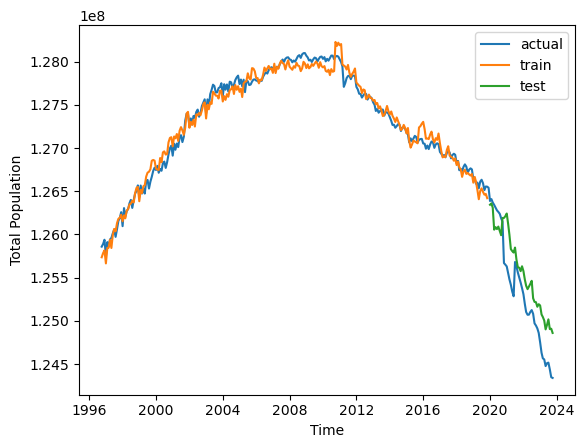

In [364]:
graph(result3)

### model4 (cross_validation tunning)

In [303]:
from prophet.diagnostics import cross_validation, performance_metrics

In [305]:
#365x3 tahun per 6 bulan
param_grid = {
    "changepoint_prior_scale":[0.001, 0.05, 0.08, 0.5],
    "seasonality_prior_scale": [0.01, 1, 5, 10, 12],
    "seasonality_mode": ["additive", "multiplicative"]
}

best_params=None
best_low_error = float('inf')

for params in ParameterGrid(param_grid):
    auto_model1 = Prophet(interval_width=0.95, changepoints=["2011-03-01","2019-12-01"], **params)
    auto_model = auto_model1.fit(train1)
    model_cv = cross_validation(auto_model1, initial="1098 days", period="180 days", horizon="180 days", parallel="processes")
    model_metrics = performance_metrics(model_cv, rolling_window=1)
    error_rate = model_metrics["rmse"].values[0]
    
    if error_rate < best_low_error:
        best_low_error = error_rate
        best_params = params

21:29:29 - cmdstanpy - INFO - Chain [1] start processing
21:29:29 - cmdstanpy - INFO - Chain [1] done processing
21:29:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:29:29 - cmdstanpy - INFO - Chain [1] start processing
21:29:30 - cmdstanpy - INFO - Chain [1] done processing
21:29:44 - cmdstanpy - INFO - Chain [1] start processing
21:29:44 - cmdstanpy - INFO - Chain [1] done processing
21:29:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:29:44 - cmdstanpy - INFO - Chain [1] start processing
21:29:44 - cmdstanpy - INFO - Chain [1] done processing
21:30:00 - cmdstanpy - INFO - Chain [1] start processing
21:30:00 - cmdstanpy - INFO - Chain [1] done processing
21:30:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

- Initial: 1098 days, equivalent to 3 years, as the initial data to train the model
- Horizon: 180 days, equivalent to 3 months of data after the initial, to be predicted
- Period: 180 days, where each subsequent iteration adds 3 months of data to the initial for training the model

In [306]:
print("best params: ", best_params)
print("score: ", best_low_error)

best params:  {'changepoint_prior_scale': 0.5, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.01}
score:  0.26505115915332067


In [350]:
model4 = Prophet(interval_width=0.95, changepoints=["2011-03-01","2019-12-01"],**best_params)
prediction4,rmse4,result4 = make_prophet(model4)

22:26:17 - cmdstanpy - INFO - Chain [1] start processing
22:26:17 - cmdstanpy - INFO - Chain [1] done processing


In [352]:
rmse4

0.31821772071609145

In [353]:
result4

Time     actual    prediction
0   1996-10-01  125859000  1.257121e+08
1   1996-11-01  125890000  1.257580e+08
2   1996-12-01  125939000  1.257904e+08
3   1997-01-01  125747000  1.256837e+08
4   1997-02-01  125912000  1.258545e+08
..         ...        ...           ...
320 2023-06-01  124511000  1.250207e+08
321 2023-07-01  124517000  1.250537e+08
322 2023-08-01  124439000  1.249673e+08
323 2023-09-01  124348000  1.249692e+08
324 2023-10-01  124340000  1.249288e+08

[325 rows x 3 columns]

In [356]:
plot_plotly(model4, prediction4)

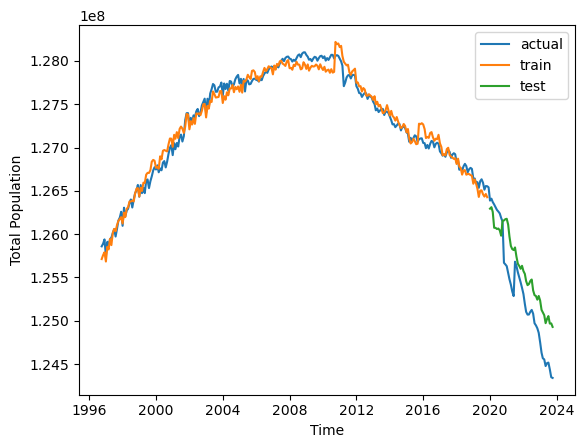

In [355]:
graph(result4)

# Comparison & Conclusion

In [378]:
print("model1's rmse: ", rmse1)
print("model2's rmse: ", rmse2)
print("model3's rmse: ", rmse3)
print("model4's rmse: ", rmse4)

model1's rmse:  0.6421826102465934
model2's rmse:  0.241230982199527
model3's rmse:  0.2959777398831356
model4's rmse:  0.31821772071609145


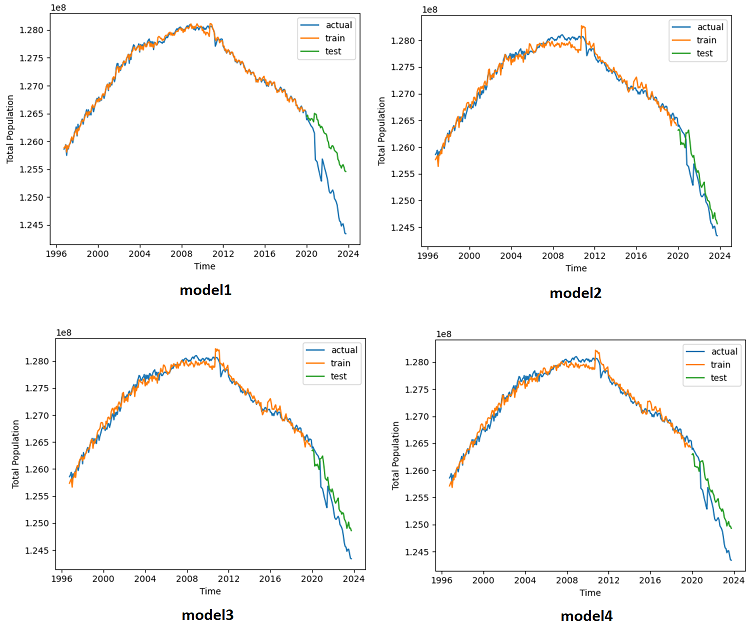

Based on the results of the four models, it can be concluded that Model2, which is the model with manually tuned "changepoints" parameter, provides the best outcome with the lowest RMSE value, and its prediction line on the testing set is the most accurate in approximating the actual values